## DPS Chapter 5:  Searching and Sorting

This notebook references these specific sections:

Ch 5 "Searching and Sorting" in Data Structures in Python (DSP):

https://runestone.academy/ns/books/published/pythonds3/BasicDS/toctree.html?mode=browsing


This notebook by:

***Eric V. Level***  

Graduate Programs in Software Engineering and Data Science  
University of St Thomas
St Paul, MN

Includes material our primary online site...:

- ***Problem Solving with Algorithms and Data Structures using Python***   
by Brad Miller and David Ranum  
Luther College 
(DSP for short)

https://runestone.academy/ns/books/published/pythonds3/index.html?mode=browsing

...along with material from this secondary source.

- ***How to Think Like a Computer Scientist in Python"***   
by Brad Miller and David Ranum  
Luther College 
(HTT for short)

https://runestone.academy/ns/books/published/thinkcspy/index.html#

### DSP 5.1 -  Chapter Objectives

- To review the ideas of computer science, programming, and problem-solving.

- To understand abstraction and the role it plays in the problem-solving process.

- To understand and implement the notion of an abstract data type.

- To review the Python programming language.

### 5.2 - Getting Started

We will now turn our attention to some of the most common problems that arise in computing, those of searching and sorting. In this section we will study searching. We will return to sorting later in the chapter. Searching is the algorithmic process of finding a particular item in a collection of items. A search typically returns either `True` or `False` when queried on whether an item is present. On occasion a search may be modified to return where the item is found. For our purposes here, we will simply concern ourselves with the question of membership.

In Python, there is a very easy way to ask whether an item is in a list of items. We use the `in` operator.

In [1]:
15 in [3, 5, 2, 4, 1]

False

In [2]:
3 in [3, 5, 2, 4, 1]

True

Even though this is easy to write, an underlying process must be carried out to answer the question. It turns out that there are many different ways to search for the item. What we are interested in here is how these algorithms work and how they compare to one another.

### 5.3 - The Sequential Search

When data items are stored in a collection such as a list, we say that they have a linear or sequential relationship. Each data item is stored in a position relative to the others. In Python lists, these relative positions are the index values of the individual items. Since these index values are ordered, it is possible for us to visit them in sequence. This process gives rise to our first search technique, the ***sequential search***.

Figure 1 shows how this search works. Starting at the first item in the list, we simply move from item to item, following the underlying sequential order until we either find what we are looking for or run out of items. If we run out of items, we have discovered that the item we were searching for was not present.

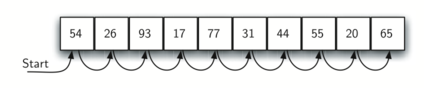

***Figure 1: Sequential Search of a List of Integers***

The Python implementation for this algorithm is shown in CodeLens 1. The function needs two items–the list and the item we are looking for–and returns a Boolean value as to whether it is present.

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheSequentialSearch.html

### 5.3.1 - Analysis of Sequential Search

To analyze searching algorithms, we need to decide on a basic unit of computation. Recall that this is typically the common step that must be repeated in order to solve the problem. For searching, it makes sense to count the number of comparisons performed. Each comparison may or may not discover the item we are looking for. In addition, we make another assumption here. The list of items is not ordered in any way. The items have been placed randomly into the list. In other words, the probability that the item we are looking for is in any particular position is exactly the same for each position of the list.

If the item is not in the list, the only way to know that is to compare it against every item present. If there are `n` items, then the sequential search requires `n` comparisons to discover that the item is not there. In the case where the item is in the list, the analysis is not so straightforward. There are actually three different scenarios that can occur. In the best case we will find the item in the first place we look, at the beginning of the list. We will need only one comparison. In the worst case, we will not discover the item until the very last comparison, the n-th comparison.

What about the average case? On average, we will find the item about half way into the list; that is, we will compare against `n/2`
items. Recall, however, that as gets large, the coefficients, no matter what they are, become insignificant in our approximation, so the complexity of the sequential search is `O(n)`. Table 1 summarizes these results.

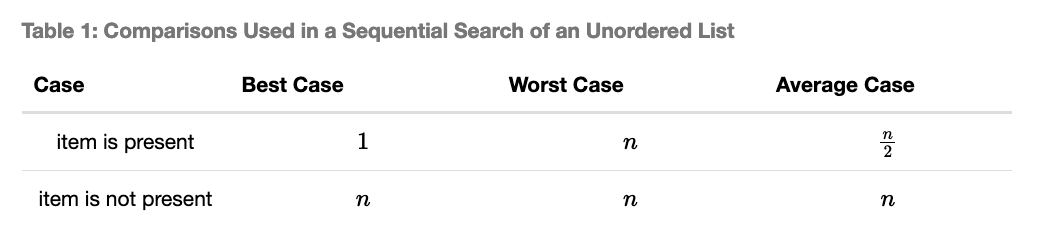

We assumed earlier that the items in our collection had been randomly placed so that there is no relative order between the items. What would happen to the sequential search if the items were ordered in some way? Would we be able to gain any efficiency in our search technique?

Assume that the list of items was constructed so that the items are in ascending order, from low to high. If the item we are looking for is present in the list, the chance of it being in any one of the

positions is still the same as before. We will still have the same number of comparisons to find the item. However, if the item is not present there is a slight advantage. Figure 2 shows this process as the algorithm looks for the item 50. Notice that items are still compared in sequence until 54. At this point, however, we know something extra. Not only is 54 not the item we are looking for, but no other elements beyond 54 can work either since the list is sorted. In this case, the algorithm does not have to continue looking through all of the items to report that the item was not found. It can stop immediately. CodeLens 2 shows this variation of the sequential search function.

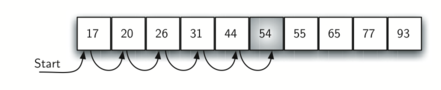

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheSequentialSearch.html#vizLayoutTdFirst

Table 2 summarizes these results. Note that in the best case we might discover that the item is not in the list by looking at only one item. On average, we will know after looking through only `n/2`
items. However, this technique is still `O(n)`. In summary, a sequential search is improved by ordering the list only in the case where we do not find the item.

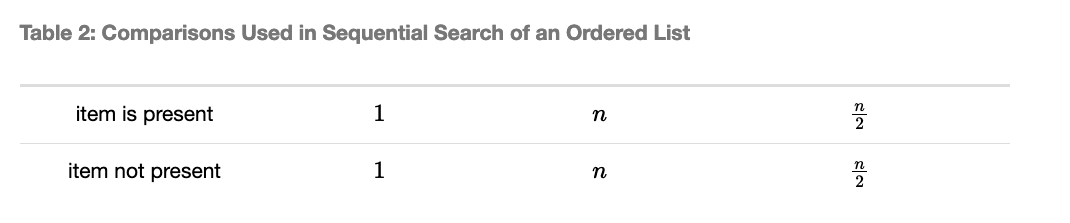

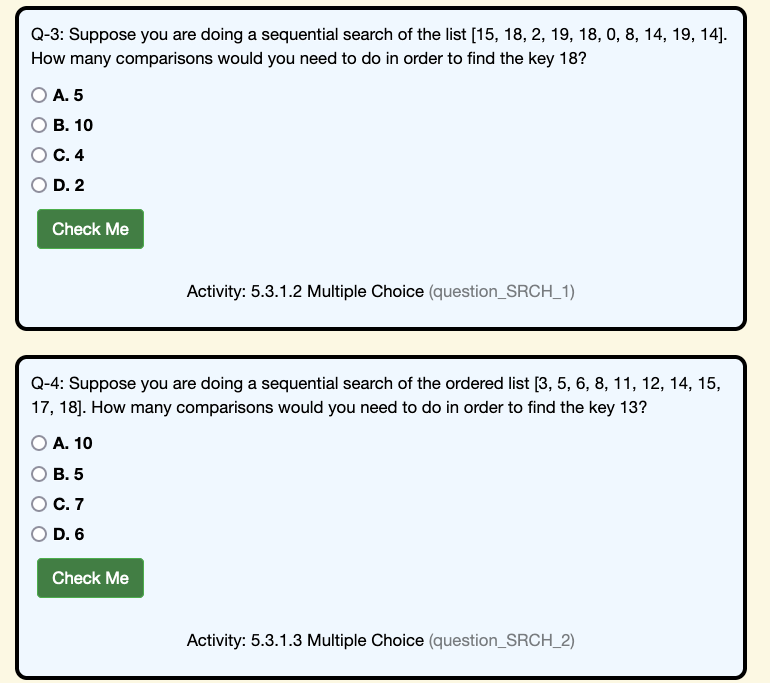

### 5.4 - The Binary Search

It is possible to take greater advantage of the ordered list if we are clever with our comparisons. In the sequential search, when we compare against the first item, there are at most

more items to look through if the first item is not what we are looking for. Instead of searching the list in sequence, a binary search will start by examining the middle item. If that item is the one we are searching for, we are done. If it is not the correct item, we can use the ordered nature of the list to eliminate half of the remaining items. If the item we are searching for is greater than the middle item, we know that the entire first (left) half of the list as well as the middle item can be eliminated from further consideration. The item, if it is in the list, must be in the second (right) half.

We can then repeat the process with the left half. Start at the middle item and compare it against what we are looking for. Again, we either find it or split the list in half, therefore eliminating another large part of our possible search space. Figure 3 shows how this algorithm can quickly find the value 54. The complete function is shown in CodeLens 3.

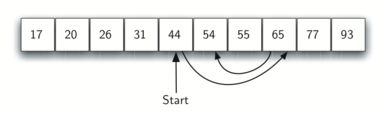

***Figure 3: Binary Search of an Ordered List of Integers***

In [3]:
# _dps-5_4_1-search3.py

def binary_search(a_list, item):
    first = 0
    last = len(a_list) - 1
    while first <= last:
        midpoint = (first + last) // 2
        if a_list[midpoint] == item:
            return True
        elif item < a_list[midpoint]:
            last = midpoint - 1
        else:
            first = midpoint + 1
    return False

test_list = [0, 1, 2, 8, 13, 17, 19, 32, 42]

print(binary_search(test_list, 3))
print(binary_search(test_list, 13))

False
True


https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheBinarySearch.html#id1

***CodeLens 3 ^^^***

Before we move on to the analysis, we should note that this algorithm is a great example of a divide and conquer strategy. Divide and conquer means that we divide the problem into smaller pieces, solve the smaller pieces in some way, and then reassemble the whole problem to get the result. When we perform a binary search of a list, we first check the middle item. If the item we are searching for is less than the middle item, we can simply perform a binary search of the left half of the original list. Likewise, if the item is greater, we can perform a binary search of the right half. Either way, this is a recursive call to the binary search function passing a smaller list. CodeLens 4 shows this recursive version.

In [4]:
# _dps-5_4_2-search4.py

def binary_search_rec(a_list, item):
    if len(a_list) == 0:
        return False
    midpoint = len(a_list) // 2
    if a_list[midpoint] == item:
        return True
    elif item < a_list[midpoint]:
        return binary_search_rec(a_list[:midpoint], item)
    else:
        return binary_search_rec(a_list[midpoint + 1 :], item)

test_list = [0, 1, 2, 8, 13, 17, 19, 32, 42]

print(binary_search_rec(test_list, 3))
print(binary_search_rec(test_list, 13))


False
True


https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheBinarySearch.html#search4_question

***CodeLens 4 ^^^***

### 5.4.1 - Analysis of Binary Search

To analyze the binary search algorithm, we need to recall that each comparison eliminates about half of the remaining items from consideration. What is the maximum number of comparisons this algorithm will require to check the entire list? If we start with `n` items, about `n/2` items will be left after the first comparison. After the second comparison, there will be about `n/4`. Then `n/8`, `n/16`, and so on. How many times can we split the list? Table 3 helps us to see the answer.

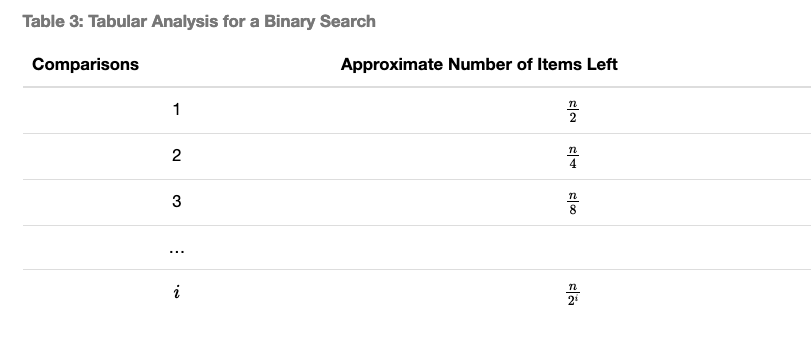

When we split the list enough times, we end up with a list that has just one item. Either that is the item we are looking for or it is not. Either way, we are done. The number of comparisons necessary to get to this point is where `n/2**i = 1`. Solving for gives us `i=log(n)`. The maximum number of comparisons is logarithmic with respect to the number of items in the list. Therefore, the binary search is `O(log n)`.

One additional analysis issue needs to be addressed. In the recursive solution shown above, the recursive call,

```binary_search_rec(a_list[:midpoint], item)```

uses slicing operator to create the left half of the list that is then passed to the next invocation (similarly for the right half as well). The analysis that we did above assumed that slicing takes constant time. However, we know that in Python it is actually `O(k)`.  

This means that the binary search using slicing will not perform in strict logarithmic time. Luckily this can be remedied by passing the list along with the starting and ending indices. The indices can be calculated as we did in Listing 3. We leave this implementation as an exercise.

Even though a binary search is generally better than a sequential search, it is important to note that for small values of `n`b, the additional cost of sorting is probably not worth it. In fact, we should always consider whether it is cost effective to take on the extra work of sorting to gain searching benefits. If we can sort once and then search many times, the cost of the sort is not so significant. However, for large lists, sorting even once can be so expensive that simply performing a sequential search from the start may be the best choice.

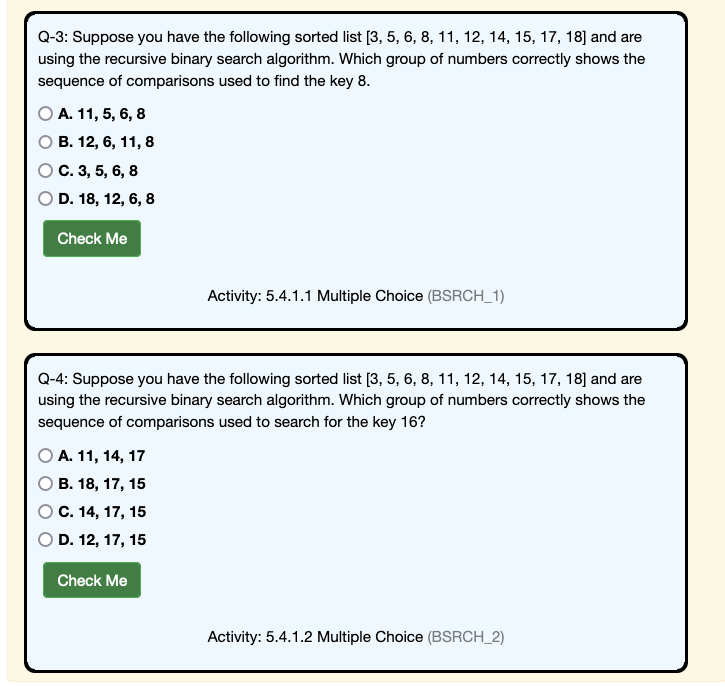

### 5.5 - Hashing

In previous sections we were able to make improvements in our search algorithms by taking advantage of information about where items are stored in the collection with respect to one another. For example, by knowing that a list was ordered, we could search in logarithmic time using a binary search. In this section we will attempt to go one step further by building a data structure that can be searched in `O(1)` time. This concept is referred to as ***hashing***.

In order to do this, we will need to know even more about where the items might be when we go to look for them in the collection. If every item is where it should be, then the search can use a single comparison to discover the presence of an item. We will see, however, that this is typically not the case.

A ***hash table*** is a collection of items which are stored in such a way as to make it easy to find them later. Each position of the hash table, often called a ***slot***, can hold an item and is named by an integer value starting at 0. For example, we will have a slot named 0, a slot named 1, a slot named 2, and so on. Initially, the hash table contains no items so every slot is empty. We can implement a hash table by using a list with each element initialized to the special Python value `None`. Figure 4 shows a hash table of size
`m=11`. In other words, there are `m` slots in the table, named 0 through 10.

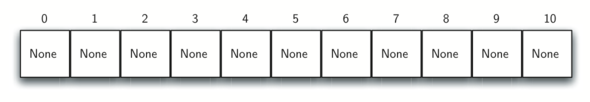

***Figure 4: Hash Table with 11 Empty Slots***

The mapping between an item and the slot where that item belongs in the hash table is called the ***hash function***. The hash function will take any item in the collection and return an integer in the range of slot names between 0 and `m-1`. Assume that we have the set of integer items 54, 26, 93, 17, 77, and 31. Our first hash function, sometimes referred to as the remainder method, simply takes an item and divides it by the table size, returning the remainder as its hash value `(h(item)=item%11)`). Table 4 gives all of the hash values for our example items. Note that this remainder method (modulo) will typically be present in some form in all hash functions since the result must be in the range of slot names.

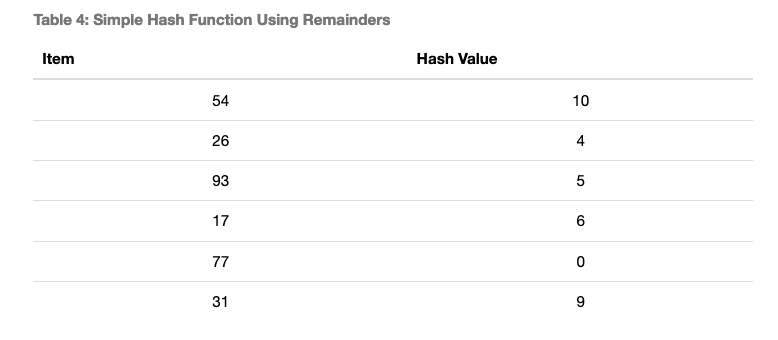

Once the hash values have been computed, we can insert each item into the hash table at the designated position as shown in Figure 5. Note that 6 of the 11 slots are now occupied. This is referred to as the ***load factor***, and is commonly denoted by `lambda = number_of_items/table_size`. For this example,`lambda=6/11`.

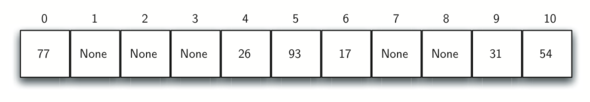

***Figure 5: Hash Table with Six Items***

Now when we want to search for an item, we simply use the hash function to compute the slot name for the item and then check the hash table to see if it is present. This searching operation is `O(1)` since a constant amount of time is required to compute the hash value and then index the hash table at that location. If everything is where it should be, we have found a constant time search algorithm.

You can probably already see that this technique is going to work only if each item maps to a unique location in the hash table. For example, if the item 44 had been the next item in our collection, it would have a hash value of 0 (`44%11=0`). Since 77 also had a hash value of 0, we would have a problem. According to the hash function, two or more items would need to be in the same slot. This is referred to as a ***collision*** (it may also be called a *clash*). Clearly, collisions create a problem for the hashing technique. We will discuss them in detail later.


### 5.5.1 - Hash Functions

Given a collection of items, a hash function that maps each item into a unique slot is referred to as a perfect hash function. If we know the items and the collection will never change, then it is possible to construct a perfect hash function. Unfortunately, given an arbitrary collection of items, there is no systematic way to construct a perfect hash function. Luckily, we do not need the hash function to be perfect to still gain performance efficiency.

One way to always have a perfect hash function is to increase the size of the hash table so that each possible value in the item range can be accommodated. This guarantees that each item will have a unique slot. Although this is practical for small numbers of items, it is not feasible when the number of possible items is large. For example, if the items were nine-digit Social Security numbers, this method would require almost one billion slots. If we only want to store data for a class of 25 students, we will be wasting an enormous amount of memory.

Our goal is to create a hash function that minimizes the number of collisions, is easy to compute, and evenly distributes the items in the hash table. To that end, there are a number of common ways to extend the simple remainder method. We will consider a few of them here.

The ***folding method*** for constructing hash functions begins by dividing the item into equal-sized pieces (the last piece may not be of equal size). These pieces are then added together to give the resulting hash value. For example, if our item was the phone number 436-555-4601, we would take the digits and divide them into groups of 2 (43, 65, 55, 46, 01). After the addition, `43+65+55+46+01` we get 1. If we assume our hash table has 11 slots, then we need to perform the extra step of dividing by 11 and keeping the remainder. In this case is `210%11` is 1, so the phone number 436-555-4601 hashes to slot 1. Some folding methods go one step further and reverse every other piece before the addition. For the above example, we get which gives `43+56+55+64+01=219` which gives `219%11=10`.

Another numerical technique for constructing a hash function is called the ***mid-square method***. We first square the item, and then extract some portion of the resulting digits. For example, if the item were 44, we would first compute `44**2 = 1936`.  By extracting the middle two digits, 93, and performing the remainder step, we get 5 (`93%11`). Table 5 shows items under both the remainder method and the mid-square method. You should verify that you understand how these values were computed.

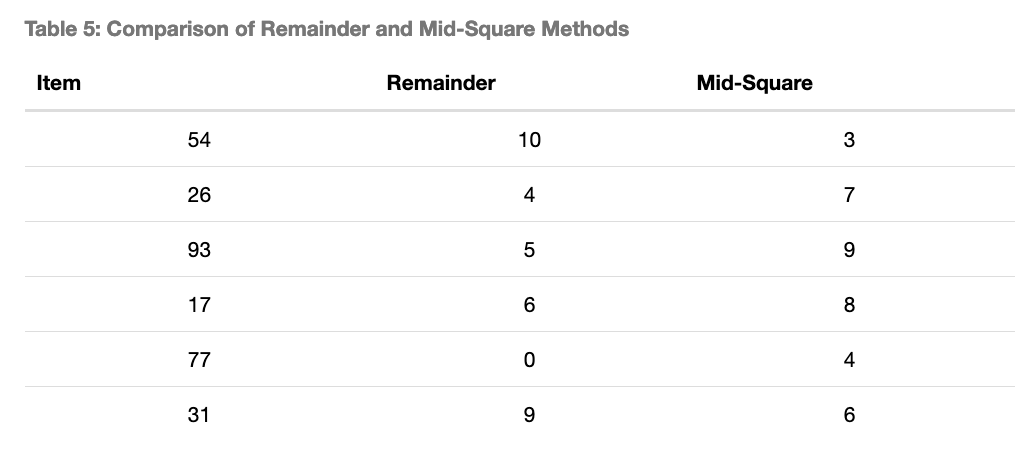

We can also create hash functions for character-based items such as strings. For example, the word `cat` can be thought of as a sequence of ordinal values.

In [5]:
ord("c")

99

In [6]:
ord("a")

97

In [7]:
ord("t")

116

We can then take these three ordinal values, add them up, and use the remainder method to get a hash value (see Figure 6). Listing 1 shows a function called `hash_str` that takes a string and a table size and returns the hash value in the range from 0 to `table_size-1`.

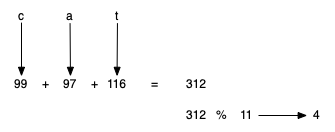

***Figure 6: Hashing a String Using Ordinal Values***

Listing 1

```
def hash_str(a_string, table_size):
    return sum([ord(c) for c in a_string]) % table_size
```


It is interesting to note that when using this hash function, anagrams will always be given the same hash value. To remedy this, we could use the position of the character as a weight. Figure 7 shows one possible way to use the positional value as a weighting factor. The modification to the `hash_str` function is left as an exercise.

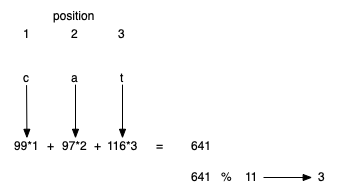

***Figure 7: Hashing a String Using Ordinal Values with Weighting***

You may be able to think of a number of additional ways to compute hash values for items in a collection. The important thing to remember is that the hash function has to be efficient so that it does not become the dominant part of the storage and search process. If the hash function is too complex, then it becomes more work to compute the slot name than it would be to simply do a basic sequential or binary search as described earlier. This would quickly defeat the purpose of hashing.

### 5.5.2 - Collision Resolution

We now return to the problem of collisions. When two items hash to the same slot, we must have a systematic method for placing the second item in the hash table. This process is called ***collision resolution***. As we stated earlier, if the hash function is perfect, collisions will never occur. However, since this is often not possible, collision resolution becomes a very important part of hashing.

One method for resolving collisions looks into the hash table and tries to find another open slot to hold the item that caused the collision. A simple way to do this is to start at the original hash value position and then move in a sequential manner through the slots until we encounter the first slot that is empty. Note that we may need to go back to the first slot (circularly) to cover the entire hash table. This collision resolution process is referred to as ***open addressing*** in that it tries to find the next open slot or address in the hash table. By systematically visiting each slot one at a time, we are performing an open addressing technique called ***linear probing***.

Figure 8 shows an extended set of integer items under the simple remainder method hash function (54, 26, 93, 17, 77, 31, 44, 55, 20). Table 4 above shows the hash values for the original six items and Figure 5 shows the contents of a hash table with those six items. Let’s see what happens when we attempt to place the additional three items into the table. When we attempt to place 44 into slot 0, a collision occurs. Under linear probing, we look sequentially, slot by slot, until we find an open position. In this case, we find slot 1.

Again, 55 should go in slot 0 but must be placed in slot 2 since it is the next open position. The final value of 20 hashes to slot 9. Since slot 9 is full, we begin to do linear probing. We visit slots 10, 0, 1, and 2, and finally find an empty slot at position 3.

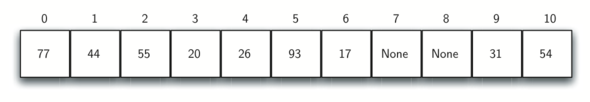

***Figure 8: A Cluster of Items for Slot 0***

One way to deal with clustering is to extend the linear probing technique so that instead of looking sequentially for the next open slot, we skip slots, thereby more evenly distributing the items that have caused collisions. This will potentially reduce the clustering that occurs. Figure 10 shows the items when collision resolution is done with what we will call a “plus 3” probe. This means that once a collision occurs, we will look at every third slot until we find one that is empty.

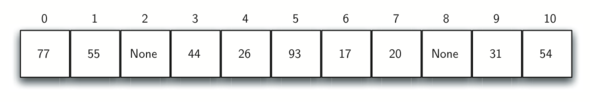

***Figure 10: Collision Resolution Using a Plus 3 Probe***

The general name for this process of looking for another slot after a collision is ***rehashing***. With simple linear probing, the rehash function is where `new_hash = rehash(old_hash)` where `rehash(pos) = (pos+1)%size` The plus 3 rehash can be defined as `rehash(pos) = (pos+3)%size`. In general, `rehash(pos) = (pos+skip)%size`.

It is important to note that the size of the skip must be such that all the slots in the table will eventually be visited. Otherwise, part of the table will be unused. To ensure this, it is often suggested that the table size be a prime number. This is the reason we have been using 11 in our examples.

A variation of the linear probing idea is called ***quadratic probing***. Instead of using a constant skip value, we use a rehash function that increments the hash value by 1, 3, 5, 7, 9, and so on. This means that if the first hash value is `h`, the successive values are `h+1`, `h+4`, `h+9`, `h+16`, and so on. In general, the `i` will be `i**2` and `rehash(pos) = (h+i**2) % size`. In other words, quadratic probing uses a skip consisting of successive perfect squares. Figure 11 shows our example values after they are placed using this technique.

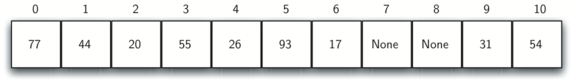

***Figure 11: Collision Resolution with Quadratic Probing***

An alternative method for handling the collision problem is to allow each slot to hold a reference to a collection (or chain) of items. ***Chaining*** allows many items to exist at the same location in the hash table. When collisions happen, the item is still placed in the proper slot of the hash table. As more and more items hash to the same location, the difficulty of searching for the item in the collection increases. Figure 12 shows the items as they are added to a hash table that uses chaining to resolve collisions.

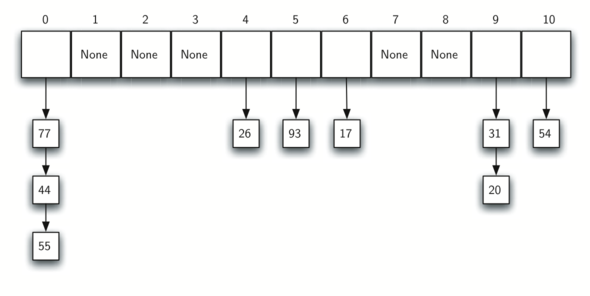

***Figure 12: Collision Resolution with Chaining***

When we want to search for an item, we use the hash function to generate the slot where it should reside. Since with chaining each slot holds a collection, we use a searching technique to decide whether the item is present. The advantage is that on the average there are likely to be many fewer items in each slot, so the search is perhaps more efficient. We will look at the analysis for hashing at the end of this section.

***Self Check***

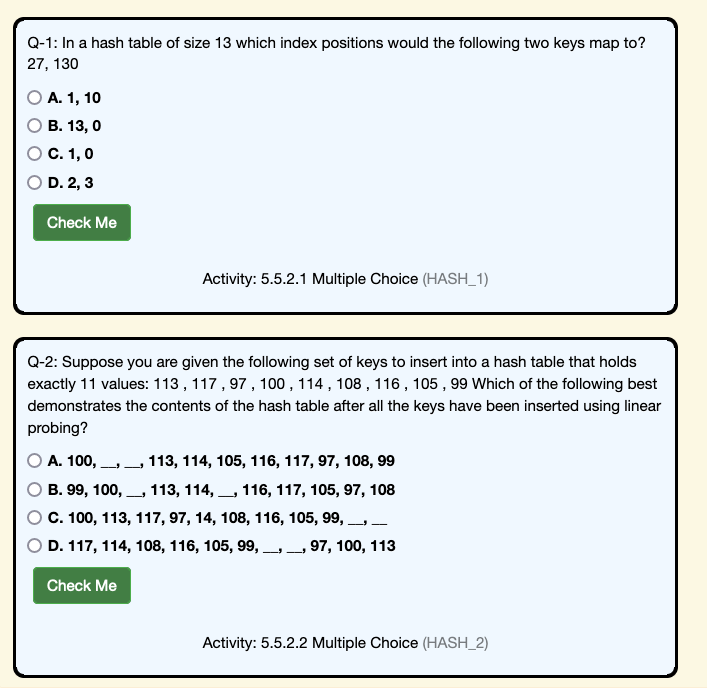

### 5.5.3 - Implementing the Map Abstract Data Type

One of the most useful Python collections is the dictionary. Recall that a dictionary is an associative data type where you can store key-data pairs. The key is used to look up the associated data value. We often refer to this idea as a map.

The map abstract data type is defined as follows. The structure is an unordered collection of associations between a key and a data value. The keys in a map are all unique so that there is a one-to-one relationship between a key and a value. The operations are given below.

- `Map()` - Creates a new, empty map. It returns an empty map collection.

- `put(key, val)` - Adds a new key-value pair to the map. If the key is already in the map, replaces the old value with the new value.

- `get(key)` - Given a key, returns the value stored in the map or None otherwise.

- `del` - Deletes the key-value pair from the map using a statement of the form del map[key].

- `len()` - Returns the number of key-value pairs stored in the map.

- `in` - Returns True for a statement of the form key in map, if the given key is in the map, False otherwise.

One of the great benefits of a dictionary is the fact that given a key, we can look up the associated data value very quickly. In order to provide this fast look-up capability, we need an implementation that supports an efficient search. We could use a list with sequential or binary search, but it would be even better to use a hash table as described above since looking up an item in a hash table can approach `O(1)` performance.

In Listing 2 we use two lists to create a `HashTable` class that implements the map abstract data type. One list, called `slots`, will hold the key items and a parallel list, called `data`, will hold the data values. When we look up a key, the corresponding position in the data list will hold the associated data value. We will treat the key list as a hash table using the ideas presented earlier. Note that the initial size for the hash table has been chosen to be 11. Although this is arbitrary, it is important that the size be a prime number so that the collision resolution algorithm can be as efficient as possible.

```
# Listing 2

class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
```

As seen in Listing 3, `hash_function` implements the simple remainder method. The collision resolution technique is linear probing with a “plus 1” rehash value. The `put` function (see Listing 3) assumes that there will eventually be an empty slot unless the key is already present in the `self.slots`. It computes the original hash value and if that slot is not empty, iterates the `rehash` function until an empty slot occurs. If a nonempty slot already contains the key, the old data value is replaced with the new data value.

```
# Listing 3

def put(self, key, data):
    hash_value = self.hash_function(key, len(self.slots))

    if self.slots[hash_value] is None:
        self.slots[hash_value] = key
        self.data[hash_value] = data
    else:
        if self.slots[hash_value] == key:
            self.data[hash_value] = data  # replace
        else:
            next_slot = self.rehash(hash_value, len(self.slots))
            while (
                self.slots[next_slot] is not None
                and self.slots[next_slot] != key # line 14
            ):
                next_slot = self.rehash(next_slot, len(self.slots))

            if self.slots[next_slot] is None:
                self.slots[next_slot] = key
                self.data[next_slot] = data
            else:
                self.data[next_slot] = data

def hash_function(self, key, size):
    return key % size

def rehash(self, old_hash, size):
    return (old_hash + 1) % size

```

The `get` function (see Listing 4) begins by computing the initial hash value. If the value is not in the initial slot, `rehash` is used to locate the next possible position. Notice that line 14 guarantees that the search will terminate by checking to make sure that we have not returned to the initial slot. If that happens, we have exhausted all possible slots and the item must not be present.

The final methods of the `HashTable` class provide additional dictionary functionality. We overload the `__getitem__` and `__setitem__` methods to allow access using `[]`. This means that once a `HashTable` has been created, the familiar index operator will be available. We leave the remaining methods as exercises.

```
# Listing 4

def get(self, key):

    start_slot = self.hash_function(key, len(self.slots))


    position = start_slot

    while self.slots[position] is not None:

        if self.slots[position] == key:

            return self.data[position]

        else:

            position = self.rehash(position, len(self.slots))

            if position == start_slot:

                return None


def __getitem__(self, key):

    return self.get(key)


def __setitem__(self, key, data):

    self.put(key, data)
```

The complete hash table example can be found below.

In [8]:
# _dsp-5_5_3-hashtablecomplete.py

class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self, key, data):
        hash_value = self.hash_function(key, len(self.slots))

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data  # replace
            else:
                next_slot = self.rehash(hash_value, len(self.slots))
                while (
                    self.slots[next_slot] is not None
                    and self.slots[next_slot] != key
                ):
                    next_slot = self.rehash(next_slot, len(self.slots))

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def hash_function(self, key, size):
        return key % size

    def rehash(self, old_hash, size):
        return (old_hash + 1) % size

    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))

        position = start_slot
        while self.slots[position] is not None:
            if self.slots[position] == key:
                return self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == start_slot:
                    return None

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, data):
        self.put(key, data)

h = HashTable()
h[54] = "cat"
h[26] = "dog"
h[93] = "lion"
h[17] = "tiger"
h[77] = "bird"
h[31] = "cow"
h[44] = "goat"
h[55] = "pig"
h[20] = "chicken"
print(h.slots)
print(h.data)
print(h[20])
print(h[17])
h[20] = "duck"
print(h[20])
print(h[99])


[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]
['bird', 'goat', 'pig', 'chicken', 'dog', 'lion', 'tiger', None, None, 'cow', 'cat']
chicken
tiger
duck
None


The following session shows the `HashTable` class in action. First we will create a hash table and store some items with integer keys and string data values.

In [9]:
h = HashTable()

h[54] = "cat"
h[26] = "dog"
h[93] = "lion"
h[17] = "tiger"
h[77] = "bird"
h[31] = "cow"
h[44] = "goat"
h[55] = "pig"
h[20] = "chicken"

In [10]:
h.slots # [77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]

[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]

In [11]:
h.data # ['bird', 'goat', 'pig', 'chicken', 'dog', 'lion', 'tiger', None, None, 'cow', 'cat']

['bird',
 'goat',
 'pig',
 'chicken',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

Next we will access and modify some items in the hash table. Note that the value for the key 20 is being replaced.

In [12]:
h[20] # 'chicken'

'chicken'

In [13]:
h[17] # 'tiger'

'tiger'

In [14]:
h[20] = "duck"

In [15]:
h[20] # 'duck'

'duck'

In [16]:
h.data # ['bird', 'goat', 'pig', 'duck', 'dog', 'lion', 'tiger', None, None, 'cow', 'cat']

['bird',
 'goat',
 'pig',
 'duck',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [17]:
print(h[99]) # None

None


### 5.5.4 - Analysis of Hashing

We stated earlier that in the best case hashing would provide a `O(1)` constant time search technique. However, due to collisions, the number of comparisons is typically not so simple. Even though a complete analysis of hashing is beyond the scope of this text, we can state some well-known results that approximate the number of comparisons necessary to search for an item.

The most important piece of information we need to analyze the use of a hash table is the load factor, `lambda`. Conceptually, if is small, then there is a lower chance of collisions, meaning that items are more likely to be in the slots where they belong. If `lambda` is large, meaning that the table is filling up, then there are more and more collisions. This means that collision resolution is more difficult, requiring more comparisons to find an empty slot. With chaining, increased collisions means an increased number of items on each chain.

As before, we will have a result for both a successful and an unsuccessful search. For a successful search using open addressing with linear probing, the average number of comparisons is approximately `(1+1/(1-lambda))/2`
and an unsuccessful search gives `(1+1/(1-lambda)**2)/2`.  If we are using chaining, the average number of comparisons is `1 + lambda/2` for the successful case, and simply `lambda` comparisons if the search is unsuccessful.

### 5.6 - Sorting

***Sorting*** is the process of placing elements from a collection in some kind of order. For example, a list of words could be sorted alphabetically or by length. A list of cities could be sorted by population, by area, or by zip code. We have already seen a number of algorithms that were able to benefit from having a sorted list (recall the final anagram example and the binary search).

There are many, many sorting algorithms that have been developed and analyzed. This suggests that sorting is an important area of study in computer science. Sorting a large number of items can take a substantial amount of computing resources. Like searching, the efficiency of a sorting algorithm is related to the number of items being processed. For small collections, a complex sorting method may be more trouble than it is worth. The overhead may be too high. On the other hand, for larger collections, we want to take advantage of as many improvements as possible. In this section we will discuss several sorting techniques and compare them with respect to their running time.

Before getting into specific algorithms, we should think about the operations that can be used to analyze a sorting process. First, it will be necessary to compare two values to see which is smaller (or larger). In order to sort a collection, it will be necessary to have some systematic way to compare values to see if they are out of order. The total number of comparisons will be the most common way to measure a sort procedure. Second, when values are not in the correct position with respect to one another, it may be necessary to exchange them. This exchange is a costly operation and the total number of exchanges will also be important for evaluating the overall efficiency of the algorithm.

### 5.7 - The Bubble Sort

The bubble sort makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place. In essence, each item bubbles up to the location where it belongs.

Figure 1 shows the first pass of a bubble sort. The shaded items are being compared to see if they are out of order. If there are
items in the list, then there are pairs of items that need to be compared on the first pass. It is important to note that once the largest value in the list is part of a pair, it will continually be moved along until the pass is complete.

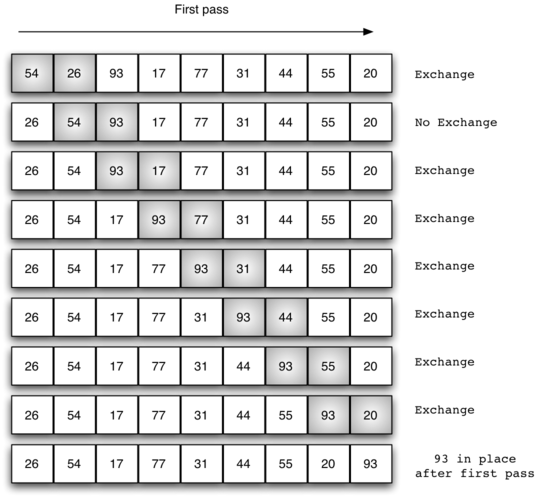

***Figure 1: Bubble Sort: The First Pass***

At the start of the second pass, the largest value is now in place. There are `n-1` items left to sort, meaning that there will be `n-2` pairs. Since each pass places the next largest value in place, the total number of passes necessary will be `n-1`. After completing the

passes, the smallest item must be in the correct position with no further processing required. ActiveCode 1 shows the complete `bubble_sort` function. It takes the list as a parameter and modifies it by exchanging items as necessary.

The exchange operation, sometimes called a ***swap***, is slightly different in Python than in most other programming languages. Typically, swapping two elements in a list requires a temporary variable (an additional memory location). A code fragment such as

```
temp = a_list[i]
a_list[i] = a_list[j]
a_list[j] = temp
```

will exchange the `i-th` and `j-th` items in the list. Without the temporary storage, one of the values would be overwritten.

In Python, it is possible to perform simultaneous assignment. The statement `a, b = b, a` will result in two assignment statements being done at the same time (see Figure 2). Using simultaneous assignment, the exchange operation can be done in one statement.

Lines 5–7 in ActiveCode 1 (below) perform the exchange of the `i-th` and `j-th`b items using the three-step procedure described earlier. Note that we could also have used the simultaneous assignment to swap the items.

In [18]:
# _dsp-5_7_1-ist_bubble.py

def bubble_sort(a_list):
    for i in range(len(a_list) - 1, 0, -1):
        for j in range(i):
            if a_list[j] > a_list[j + 1]:
                temp = a_list[j]
                a_list[j] = a_list[j + 1]
                a_list[j + 1] = temp


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubble_sort(a_list)
print(a_list)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


The following animation shows bubble_sort in action.

Bubble sort simulation : https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheBubbleSort.html#bubble_anim

To analyze the bubble sort, we should note that regardless of how the items are arranged in the initial list, `n-1` passes will be made to sort a list of size `n`. Table 1 shows the number of comparisons for each pass. The total number of comparisons is the sum of the first `n-1` integers. Recall that the sum of the first integers `n` is
`(n**2+n)/2` . The sum of the first integers is `(n**2+n)/2 - n`, which is `(n**2-n)/2`
. This is still `O(n**2)` comparisons. In the best case, if the list is already ordered, no exchanges will be made. However, in the worst case, every comparison will cause an exchange. On average, we exchange half of the time.

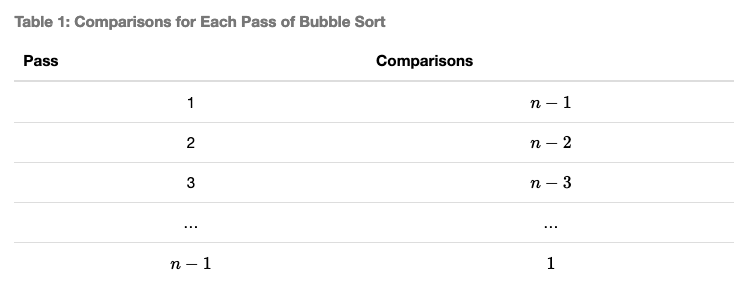

A bubble sort is often considered the most inefficient sorting method since it must exchange items before the final location is known. These “wasted” exchange operations are very costly. However, because the bubble sort makes passes through the entire unsorted portion of the list, it has the capability to do something most sorting algorithms cannot. In particular, if during a pass there are no exchanges, then we know that the list must be sorted. A bubble sort can be modified to stop early if it finds that the list has become sorted. This means that for lists that require just a few passes, a bubble sort may have an advantage in that it will recognize the sorted list and stop. ActiveCode 2 (below) shows this modification, which is often referred to as the short bubble.

In [19]:
# _dsp-5_7_2-lst_shortbubble.py

def bubble_sort_short(a_list):
    for i in range(len(a_list) - 1, 0, -1):
        exchanges = False
        for j in range(i):
            if a_list[j] > a_list[j + 1]:
                exchanges = True
                a_list[j], a_list[j + 1] = a_list[j + 1], a_list[j]
        if not exchanges:
            break


a_list = [20, 30, 40, 90, 50, 60, 70, 80, 100, 110]
bubble_sort_short(a_list)
print(a_list)


[20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


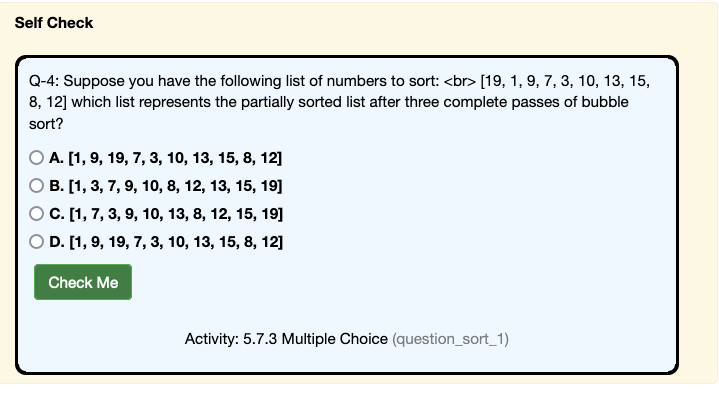

### 5.8 - The Selection Sort

The selection sort improves on the bubble sort by making only one exchange for every pass through the list. In order to do this, a selection sort looks for the largest value as it makes a pass and, after completing the pass, places it in the proper location. As with a bubble sort, after the first pass, the largest item is in the correct place. After the second pass, the next largest is in place. This process continues and requires `n-1` passes to sort items, since the final item must be in place after the `(n-1)-th` pass.

Figure 3 shows the entire sorting process for the selection sort. On each pass, the largest remaining item is selected and then placed in its proper location. The first pass places 93, the second pass places 77, the third places 55, and so on. The function is shown in ActiveCode 1.


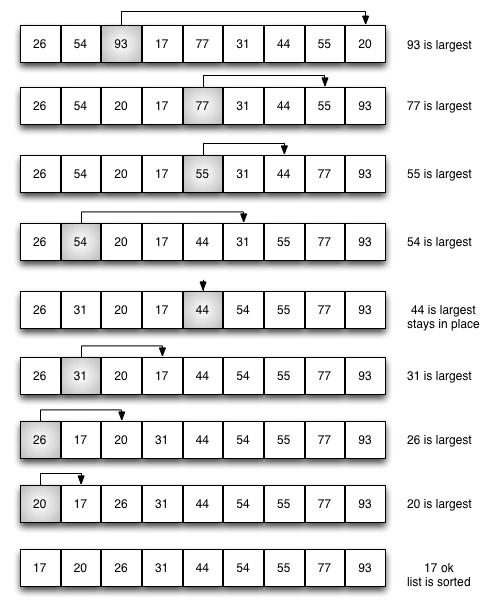

***Figure 3: Selection Sort: Complete***

In [20]:
# _dsp-5_8_1-lst_selectionsortcode.py

def selection_sort(a_list):
    for i, item in enumerate(a_list):
        min_idx = len(a_list) - 1
        for j in range(i, len(a_list)):
            if a_list[j] < a_list[min_idx]:
                min_idx = j
        if min_idx != i:
            a_list[min_idx], a_list[i] = a_list[i], a_list[min_idx]


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
selection_sort(a_list)
print(a_list)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


***Selection sort simulation:***

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheSelectionSort.html#selection_anim

You may see that the selection sort makes the same number of comparisons as the bubble sort and is therefore also
`O(n**2)`. However, due to the reduction in the number of exchanges, the selection sort typically executes faster in benchmark studies. In fact, for our list, the bubble sort makes 20 exchanges, while the selection sort makes only 8.

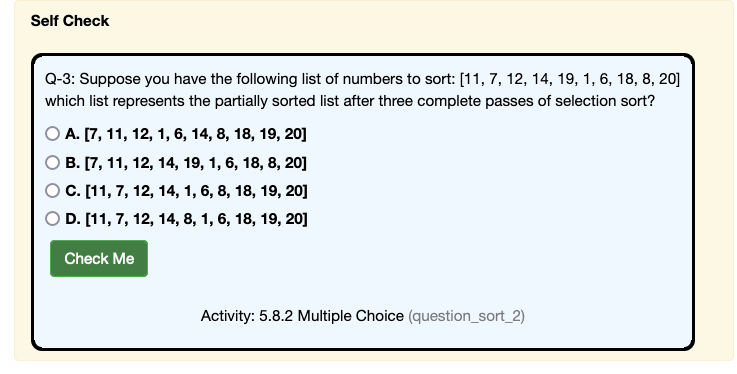

### 5.9 - The Insertion Sort

The insertion sort, although still `O(n**2)`, works in a slightly different way. It always maintains a sorted sublist in the lower positions of the list. Each new item is then inserted back into the previous sublist such that the sorted sublist is one item larger. Figure 4 shows the insertion sorting process. The shaded items represent the ordered sublists as the algorithm makes each pass.

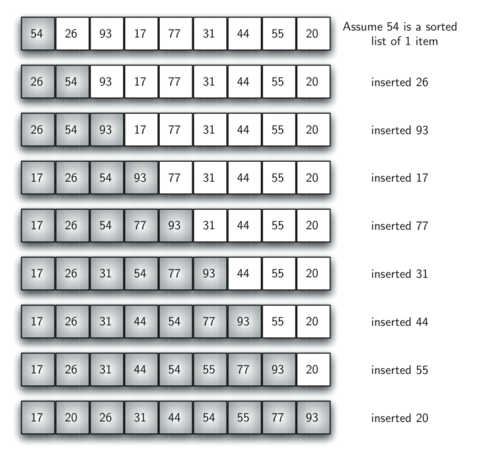

***Figure 4: Insertion Sort: Complete***

We begin by assuming that a list with one item (position ) is already sorted. On each pass, one for each item 1 through `n-1`, the current item is checked against those in the already sorted sublist. As we look back into the already sorted sublist, we shift those items that are greater to the right. When we reach a smaller item or the end of the sublist, the current item can be inserted.

Figure 5 shows the fifth pass in detail. At this point in the algorithm, here is a sorted sublist of five items: 17, 26, 54, 77, and 93. We want to insert 31 back into the already sorted items. The first comparison against 93 causes 93 to be shifted to the right. 77 and 54 are also shifted. When the item 26 is encountered, the shifting process stops and 31 is placed in the open position. Now we have a sorted sublist of six items.


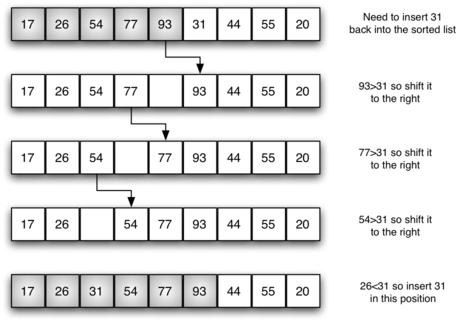

***Figure 5: Insertion Sort: Fifth Pass of the Sort***

The implementation of `insertion_sort` (ActiveCode 1 below) shows that there are again `n-1` passes to sort `n` items. The iteration starts at position 1 and moves through position `n-1`, as these are the items that need to be inserted back into the sorted sublists. Line 8 performs the shift operation that moves a value up one position in the list, making room behind it for the insertion. Remember that this is not a complete exchange as was performed in the previous algorithms.

The maximum number of comparisons for an insertion sort is the sum of the first `n-1` integers. Again, this is `O(n**2)`. However, in the best case, only one comparison needs to be done on each pass. This would be the case for an already sorted list.

One note about shifting versus exchanging is also important. In general, a shift operation requires approximately a third of the processing work of an exchange since only one assignment is performed. In benchmark studies, insertion sort will show very good performance.

In [21]:
# _dsp-5_9_1-lst_insertion.py

def insertion_sort(a_list):
    for i in range(1, len(a_list)):
        cur_val = a_list[i]
        cur_pos = i

        while cur_pos > 0 and a_list[cur_pos - 1] > cur_val:
            a_list[cur_pos] = a_list[cur_pos - 1]
            cur_pos = cur_pos - 1
        a_list[cur_pos] = cur_val


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insertion_sort(a_list)
print(a_list)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


***Insertion sort animation:***

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheInsertionSort.html#insertion_anim

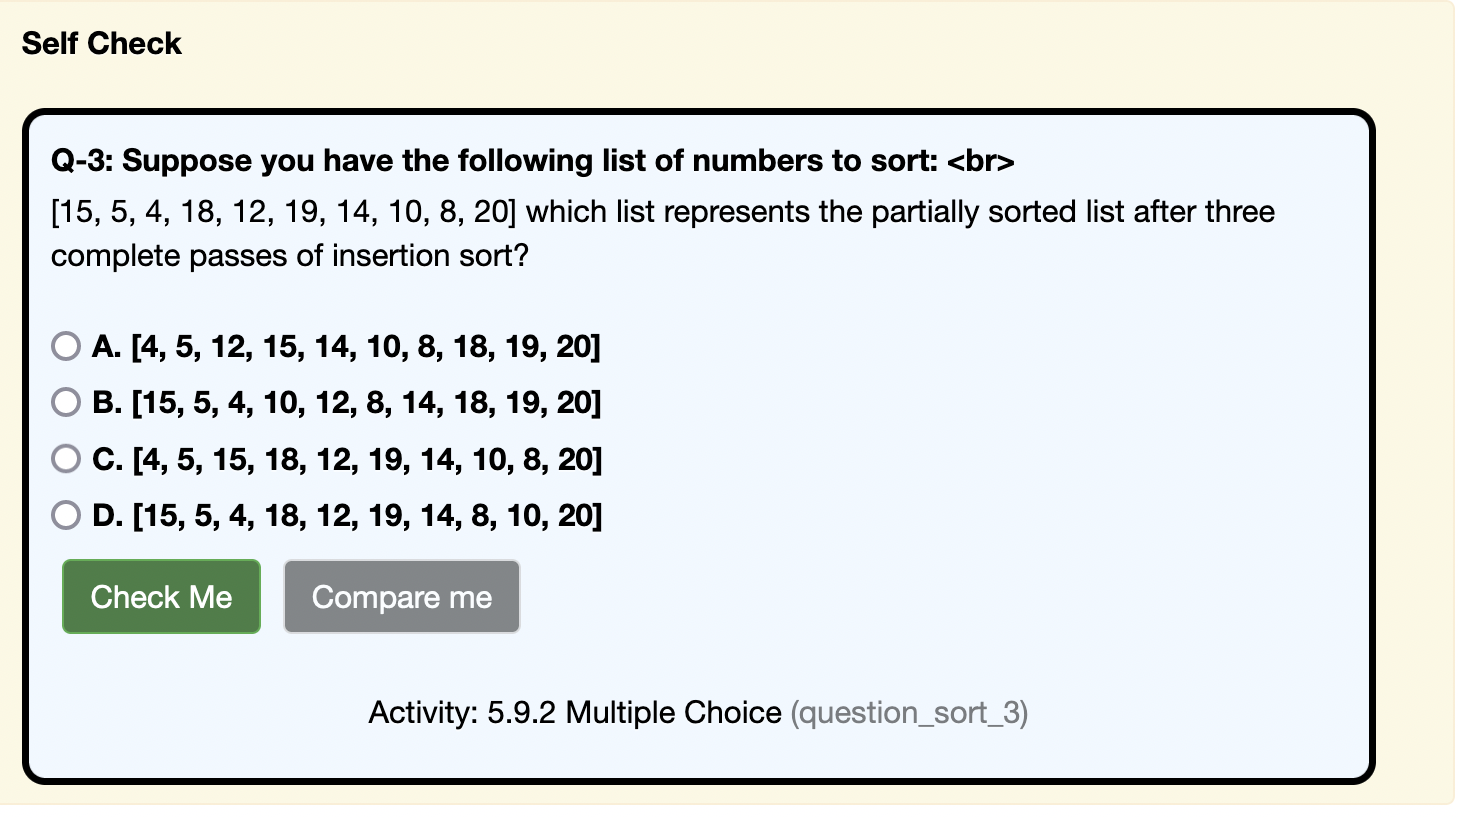

### 5.10 - The Shell Sort

The ***Shell sort***, sometimes called the *diminishing increment sort*, improves on the insertion sort by breaking the original list into a number of smaller sublists, each of which is sorted using an insertion sort. The unique way that these sublists are chosen is the key to the Shell sort. Instead of breaking the list into sublists of contiguous items, the Shell sort uses an increment `i`, sometimes called the ***gap***, to create a sublist by choosing all items that are `i` items apart.

This can be seen in Figure 6. This list has nine items. If we use an increment of three, there are three sublists, each of which can be sorted by an insertion sort. After completing these sorts, we get the list shown in Figure 7. Although the list shown in Figure 7 is not completely sorted, something very interesting has happened. By sorting the sublists, we have moved the items closer to where they actually belong.

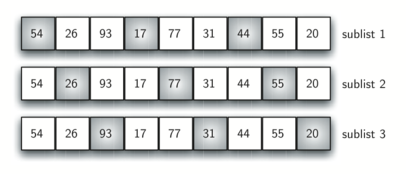

***Figure 6: A Shell Sort with Increments of Three***

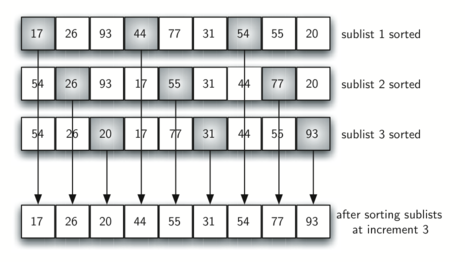

***Figure 7: A Shell Sort after Sorting Each Sublist***

Figure 8 shows a final insertion sort using an increment of one—in other words, a standard insertion sort. Note that by performing the earlier sublist sorts, we have now reduced the total number of shifting operations necessary to put the list in its final order. For this case, we need only four more shifts to complete the process.

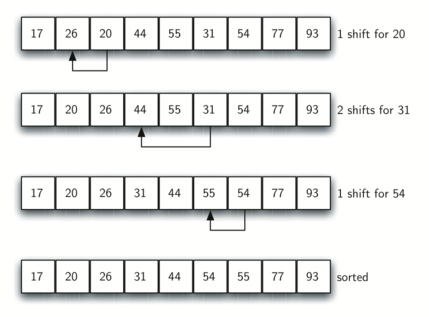

***Figure 8: ShellSort: A Final Insertion Sort with Increment of 1***


We said earlier that the way in which the increments are chosen is the unique feature of the Shell sort. The function shown in ActiveCode 1 uses a different set of increments. In this case, we begin with `n/2`
sublists. On the next pass, `n/4` sublists are sorted. Eventually, a single list is sorted with the basic insertion sort. Figure 9 shows the first sublists for our example using this increment.

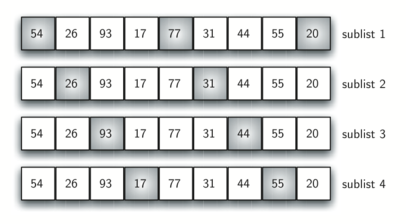

***Figure 9: Initial Sublists for a Shell Sort***

The following invocation of the `shell_sort` function shows the partially sorted lists after each increment, with the final sort being an insertion sort with an increment of one.

In [22]:
# _dsp-5_10_5-lst_shellSort.py

def shell_sort(a_list):
    sublist_count = len(a_list) // 2
    while sublist_count > 0:
        for pos_start in range(sublist_count):
            gap_insertion_sort(a_list, pos_start, sublist_count)
        print("After increments of size", sublist_count, "the list is", a_list)
        sublist_count = sublist_count // 2


def gap_insertion_sort(a_list, start, gap):
    for i in range(start + gap, len(a_list), gap):
        cur_val = a_list[i]
        cur_pos = i
        while cur_pos >= gap and a_list[cur_pos - gap] > cur_val:
            a_list[cur_pos] = a_list[cur_pos - gap]
            cur_pos = cur_pos - gap
        a_list[cur_pos] = cur_val


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
shell_sort(a_list)
print(a_list)

After increments of size 4 the list is [20, 26, 44, 17, 54, 31, 93, 55, 77]
After increments of size 2 the list is [20, 17, 44, 26, 54, 31, 77, 55, 93]
After increments of size 1 the list is [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


***Shell sort simulation:***

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheShellSort.html#shell_anim

At first glance you may think that a Shell sort cannot be better than an insertion sort since it does a complete insertion sort as the last step. It turns out, however, that this final insertion sort does not need to do very many comparisons (or shifts) since the list has been presorted by earlier incremental insertion sorts, as described above. In other words, each pass produces a list that is “more sorted” than the previous one. This makes the final pass very efficient.

Although a general analysis of the Shell sort is well beyond the scope of this text, we can say that it tends to fall somewhere between `O(n)` and `O(n**2)`, based on the behavior described above. For the increments shown in Listing 5, the performance is `O(n**2)`. By changing the increment, for example using (1, 3, 7, 15, 31, and so on), a Shell sort can perform at `O(n**3/2)`.

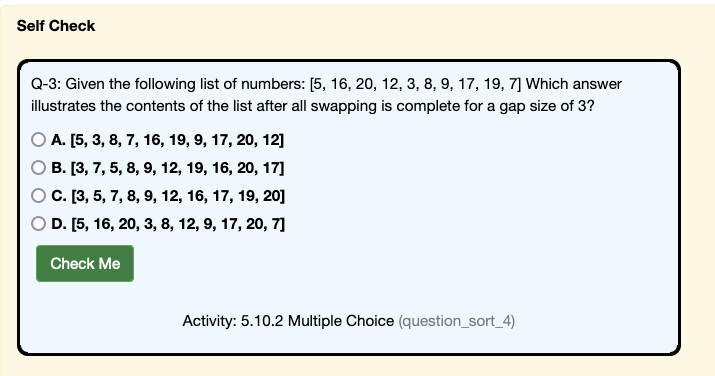

### 5.11 - The Merge Sort

We now turn our attention to using a divide and conquer strategy as a way to improve the performance of sorting algorithms. The first algorithm we will study is the ***merge sort***. Merge sort is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). If the list has more than one item, we split the list and recursively invoke a merge sort on both halves. Once the two halves are sorted, the fundamental operation, called a ***merge***, is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single, sorted, new list. Figure 10 shows our familiar example list as it is being split by `merge_sort`. Figure 11 shows the simple lists, now sorted, as they are merged back together.

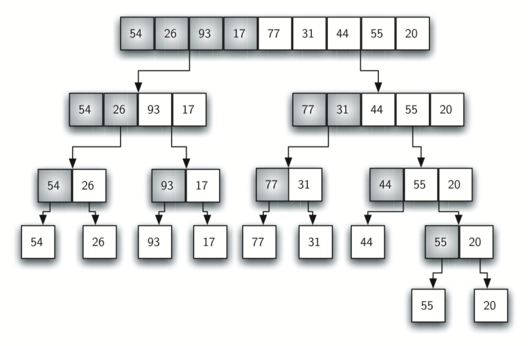

***Figure 10: Splitting the List in a Merge Sort***

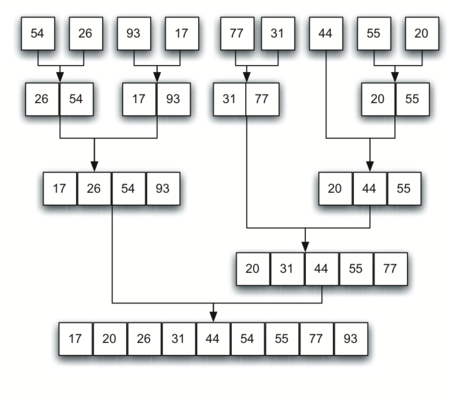

***Figure 11: Lists as They Are Merged Together***

The `merge_sort` function shown in ActiveCode 1 (below) begins by asking the base case question. If the length of the list is less than or equal to one, then we already have a sorted list and no more processing is necessary. If, on the other hand, the length is greater than one, then we use the Python slice operation to extract the left and right halves. It is important to note that the list may not have an even number of items. That does not matter, as the lengths will differ by at most one.

In [23]:
# _dsp-5_11_3-lst_mergeSort.py

def merge_sort(a_list):
    print("Splitting", a_list) # line 2
    if len(a_list) > 1:
        mid = len(a_list) // 2
        left_half = a_list[:mid]
        right_half = a_list[mid:]

        merge_sort(left_half) # line 8
        merge_sort(right_half) # line 9

        i, j, k = 0, 0, 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] <= right_half[j]:
                a_list[k] = left_half[i]
                i = i + 1
            else:
                a_list[k] = right_half[j]
                j = j + 1
            k = k + 1

        while i < len(left_half):
            a_list[k] = left_half[i]
            i = i + 1
            k = k + 1

        while j < len(right_half):
            a_list[k] = right_half[j]
            j = j + 1
            k = k + 1
    print("Merging", a_list) # line 30


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
merge_sort(a_list)
print(a_list)

Splitting [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting [54, 26, 93, 17]
Splitting [54, 26]
Splitting [54]
Merging [54]
Splitting [26]
Merging [26]
Merging [26, 54]
Splitting [93, 17]
Splitting [93]
Merging [93]
Splitting [17]
Merging [17]
Merging [17, 93]
Merging [17, 26, 54, 93]
Splitting [77, 31, 44, 55, 20]
Splitting [77, 31]
Splitting [77]
Merging [77]
Splitting [31]
Merging [31]
Merging [31, 77]
Splitting [44, 55, 20]
Splitting [44]
Merging [44]
Splitting [55, 20]
Splitting [55]
Merging [55]
Splitting [20]
Merging [20]
Merging [20, 55]
Merging [20, 44, 55]
Merging [20, 31, 44, 55, 77]
Merging [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


Once the `merge_sort` function is invoked on the left half and the right half (lines 8–9), it is assumed they are sorted. The rest of the function (lines 11–29) is responsible for merging the two smaller sorted lists into a larger sorted list. Notice that the merge operation places the items back into the original list (`a_list`) one at a time by repeatedly taking the smallest item from the sorted lists. Note that the condition in line 13 (`left_half[i] <= right_half[j]`) ensures that the algorithm is stable. A ***stable algorithm*** maintains the order of duplicate items in a list and is preferred in most cases.

The `merge_sort` function has been augmented with a `print` statement (line 2) to show the contents of the list being sorted at the start of each invocation. There is also a `print` statement (line 30) to show the merging process. The transcript shows the result of executing the function on our example list. Note that the list with 44, 55, and 20 will not divide evenly. The first split gives `[44]` and the second gives `[55, 20]`. It is easy to see how the splitting process eventually yields a list that can be immediately merged with other sorted lists.


***Merge sort animation:***

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheMergeSort.html#merge_anim

In order to analyze the `merge_sort` function, we need to consider the two distinct processes that make up its implementation. First, the list is split into halves. We already computed (in a binary search) that we can divide a list in half times where is the length of the list. The second process is the merge. Each item in the list will eventually be processed and placed on the sorted list. So the merge operation which results in a list of size requires operations. The result of this analysis is that splits, each of which costs for a total of operations. A merge sort is an `O(n*log(n))` algorithm.

Recall that the slicing operator is `O(k)` where is the size of the slice. In order to guarantee that `merge_sort` will be `O(n*log(n))`, we will need to remove the slice operator. Again, this is possible if we simply pass the starting and ending indices along with the list when we make the recursive call. We leave this as an exercise.

It is important to notice that the `merge_sort` function requires extra space to hold the two halves as they are extracted with the slicing operations. This additional space can be a critical factor if the list is large and can make this sort problematic when working on large data sets.

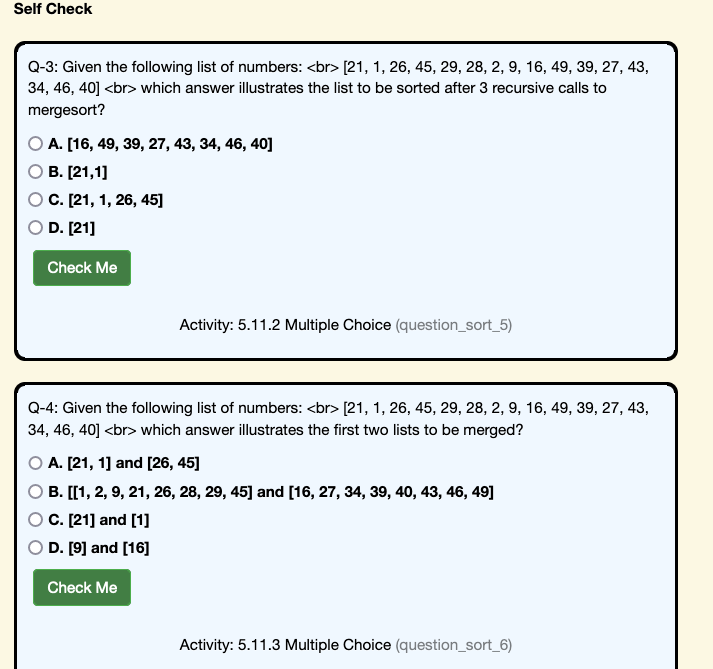

### 5.12 - The Quicksort Sort

The ***quicksort*** uses divide and conquer to gain the same advantages as the merge sort, while not using additional storage. As a trade-off, however, it is possible that the list may not be divided in half. When this happens, we will see that performance is diminished.

A quicksort first selects a value, which is called the ***pivot value***. Although there are many different ways to choose the pivot value, we will simply use the first item in the list. The role of the pivot value is to assist with splitting the list. The actual position where the pivot value belongs in the final sorted list, commonly called the ***split point***, will be used to divide the list for subsequent calls to the quicksort.

Figure 12 shows that 54 will serve as our first pivot value. Since we have looked at this example a few times already, we know that 54 will eventually end up in the position currently holding 31. The partition process will happen next. It will find the split point and at the same time move other items to the appropriate side of the list, either less than or greater than the pivot value.


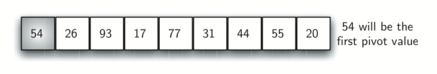

***Figure 12: The First Pivot Value for a Quicksort***

Partitioning begins by locating two position markers—let’s call them `left_mark` and `right_mark` —at the beginning and end of the remaining items in the list (positions 1 and 8 in Figure 13). The goal of the partition process is to move items that are on the wrong side with respect to the pivot value while also converging on the split point. Figure 13 shows this process as we locate the position of 54.

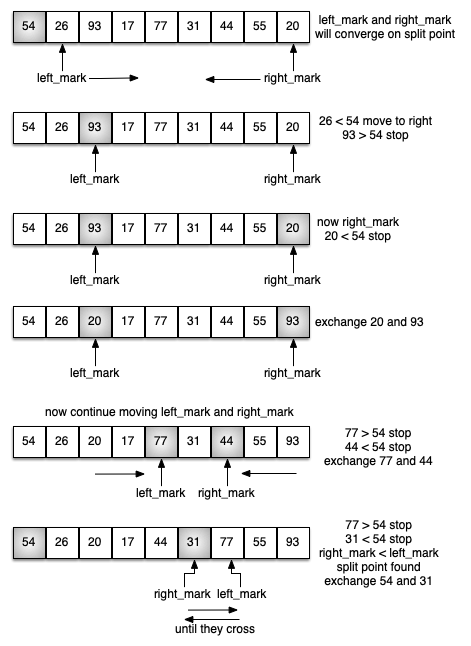

***Figure 13: Finding the Split Point for 54***

We begin by incrementing `left_mark` until we locate a value that is greater than the pivot value. We then decrement `right_mark` until we find a value that is less than the pivot value. At this point we have discovered two items that are out of place with respect to the eventual split point. For our example, this occurs at 93 and 20. Now we can exchange these two items and then repeat the process again.

At the point where `right_mark` becomes less than `left_mark`, we stop. The position of `right_mark` is now the split point. The pivot value can be exchanged with the contents of the split point and the pivot value is now in place (Figure 14). In addition, all the items to the left of the split point are less than the pivot value, and all the items to the right of the split point are greater than the pivot value. The list can now be divided at the split point and the quicksort can be invoked recursively on the two halves.

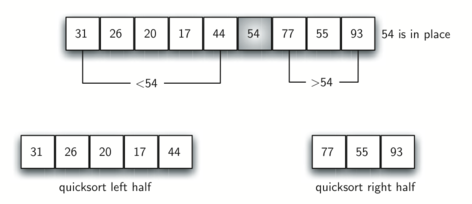

***Figure 14: Completing the Partition Process to Find the Split Point for 54***

The `quick_sort` function shown in ActiveCode 1 (below) invokes a recursive function, `quick_sort_helper`. `quick_sort_helper` begins with the same base case as the merge sort. If the length of the list is less than or equal to one, it is already sorted. If it is greater, then it can be partitioned and recursively sorted. The partition function implements the process described earlier.

In [24]:
# _dsp-5_12_4-lst_quick.py

def quick_sort(a_list):
    quick_sort_helper(a_list, 0, len(a_list) - 1)


def quick_sort_helper(a_list, first, last):
    if first < last:
        split = partition(a_list, first, last)
        quick_sort_helper(a_list, first, split - 1)
        quick_sort_helper(a_list, split + 1, last)

def partition(a_list, first, last):
    pivot_val = a_list[first]
    left_mark = first + 1
    right_mark = last
    done = False

    while not done:
        while left_mark <= right_mark and a_list[left_mark] <= pivot_val:
            left_mark = left_mark + 1
        while left_mark <= right_mark and a_list[right_mark] >= pivot_val:
            right_mark = right_mark - 1
        if right_mark < left_mark:
            done = True
        else:
            a_list[left_mark], a_list[right_mark] = (
                a_list[right_mark],
                a_list[left_mark],
            )
    a_list[first], a_list[right_mark] = a_list[right_mark], a_list[first]

    return right_mark


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
quick_sort(a_list)
print(a_list)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


***Quicksort simulation***:

https://runestone.academy/ns/books/published/pythonds3/SortSearch/TheQuickSort.html#quick_anim

To analyze the `quick_sort` function, note that for a list of length `n`, if the partition always occurs in the middle of the list, there will again be `log(n)` divisions. In order to find the split point, each of the items needs to be checked against the pivot value. The result is `O(n*log(n))`. In addition, there is no need for additional memory as in the merge sort process.

Unfortunately, in the worst case, the split points may not be in the middle and can be very skewed to the left or the right, leaving a very uneven division. In this case, sorting a list of `n` items divides into sorting a list of 0 items and a list of `n-1` items. Then sorting a list of `n-1` divides into a list of size 0 and a list of size `n-2`, and so on. The result is an `O(n**2)` sort with all of the overhead that recursion requires.

We mentioned earlier that there are different ways to choose the pivot value. In particular, we can attempt to alleviate some of the potential for an uneven division by using a technique called ***median of three***. To choose the pivot value, we will consider the first, the middle, and the last element in the list. In our example, those are 54, 77, and 20. Now pick the median value, in our case 54, and use it for the pivot value (of course, that was the pivot value we used originally). The idea is that in the case where the first item in the list does not belong toward the middle of the list, the median of three will choose a better “middle” value. This will be particularly useful when the original list is somewhat sorted to begin with. We leave the implementation of this pivot value selection as an exercise.

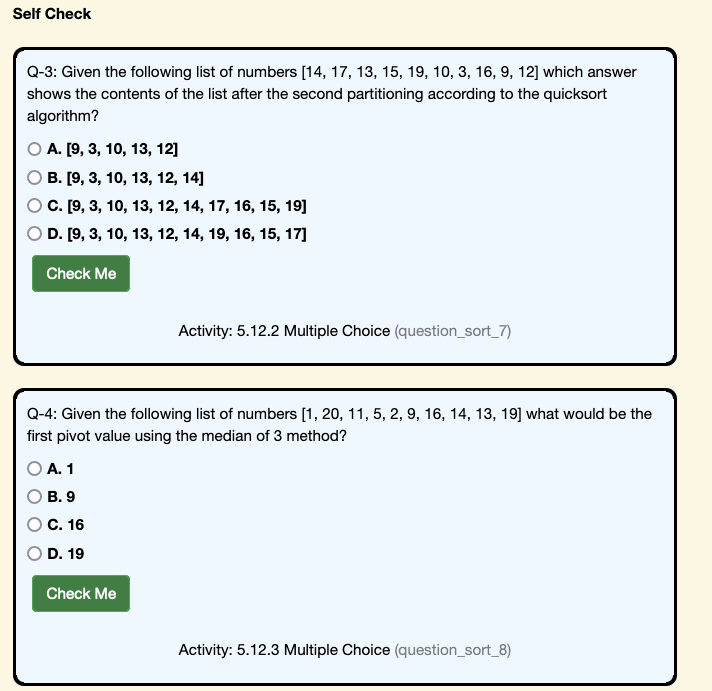

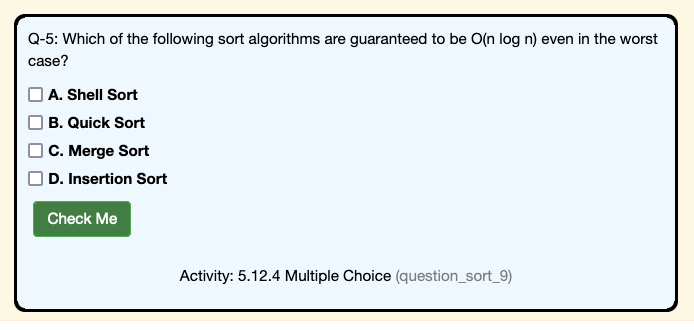

### 5.13 - Summary

- A sequential search is `O(n)` for ordered and unordered lists.

- A binary search of an ordered list is `O(log(n))` in the worst case.

- Hash tables can provide constant time searching.

- A bubble sort, a selection sort, and an insertion sort are `O(n**2)` algorithms.

- A Shell sort improves on the insertion sort by sorting incremental sublists. It falls between
and `O(n)` and `O(n**2)`.

- A merge sort is `O(n*log(n))`, but requires additional space for the merging process.

- A quicksort is `O(n*log(n))`, but may degrade to `O(n**2)` if the split points are not near the middle of the list. It does not require additional space.

### 5.14 - Key Terms

- binary search
	
- insertion sort
	
- pivot value

- bubble sort
	
- linear probing
	
- quadratic probing

- chaining	

- load factor
	
- quicksort

- clustering	

- map	

- rehashing

- collision
	
- median of three
	
- selection sort

- collision resolution
	
- merge
	
- sequential search

- folding method
	
- merge sort
	
- Shell sort

- gap
	
- mid-square method
	
- short bubble

- hash function
	
- open addressing
	
- slot

- hash table
	
- partition
	
- split point

- hashing
	
- perfect hash function
	
- stable algorithm

### 5.15 - Discussion Questions

1. Using the hash table performance formulas given in the chapter, compute the average number of comparisons necessary when the table is

- 10% full

- 25% full

- 50% full

- 75% full

- 90% full

- 99% full

      At what point do you think the hash table is too small? Explain.

2. Modify the hash function for strings to use positional weightings.

3. We used a hash function for strings that weighted the characters by position. Devise an alternative weighting scheme. What are the biases that exist with these functions?

4. Research perfect hash functions. Using a list of names (classmates, family members, etc.), generate the hash values using the perfect hash algorithm.

5. Generate a random list of integers. Show how this list is sorted by the following algorithms:

- bubble sort

- selection sort

- insertion sort

- Shell sort (you decide on the increments)

- merge sort

- quicksort (you decide on the pivot value)

6. Consider the following list of integers: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`. Show how this list is sorted by the following algorithms:

- bubble sort

- selection sort

- insertion sort

- Shell sort (you decide on the increments)

- merge sort

- quicksort (you decide on the pivot value)

7. Consider the following list of integers: `[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]`. Show how this list is sorted by the following algorithms:

- bubble sort

- selection sort

- insertion sort

- Shell sort (you decide on the increments)

- merge sort

- quicksort (you decide on the pivot value)

9. Consider the list of characters: `["P", "Y", "T", "H", "O", "N"]`. Show how this list is sorted using the following algorithms:

- bubble sort

- selection sort

- insertion sort

- Shell sort (you decide on the increments)

- merge sort

- quicksort (you decide on the pivot value)

10. Devise alternative strategies for choosing the pivot value in quick sort. For example, pick the middle item. Reimplement the algorithm and then execute it on random data sets. Under what criteria does your new strategy perform better or worse than the strategy from this chapter?


### 5.16 - Programming Exercises

1. Set up a random experiment to test the difference between a sequential search and a binary search on a list of integers.


2. Use the binary search functions given in the text (recursive and iterative). Generate a random, ordered list of integers and do a benchmark analysis for each one. What are your results? Can you explain them?


3. Implement the binary search using recursion without the slice operator. Recall that you will need to pass the list along with the starting and ending index values for the sublist. Generate a random, ordered list of integers and do a benchmark analysis.


4. Implement the `len` method (`__len__`) for the hash table Map ADT implementation.


5. Implement the `in` method (`__contains__`) for the hash table Map ADT implementation.


6. How can you delete items from a hash table that uses chaining for collision resolution? How about if open addressing is used? What are the special circumstances that must be handled? Implement the `del` method for the `HashTable` class.


7. In the hash table map implementation, the hash table size was chosen to be 101. If the table gets full, this needs to be increased. Re-implement the `put` method so that the table will automatically resize itself when the loading factor reaches a predetermined value (you can decide the value based on your assessment of load versus performance).


8. Implement quadratic probing as a rehash technique.


9. Using a random number generator, create a list of 500 integers. Perform a benchmark analysis using some of the sorting algorithms from this chapter. What is the difference in execution speed?


10. A bubble sort can be modified to “bubble” in both directions. The first pass moves “up” the list, and the second pass moves “down.” This alternating pattern continues until no more passes are necessary. Implement this variation and describe under what circumstances it might be appropriate.


11. Perform a benchmark analysis for a shell sort, using different increment sets on the same list.


12. Implement the `merge_sort` function without using the slice operator.


13. One way to improve the quick sort is to use an insertion sort on lists that have a short length (call it the “partition limit”). Why does this make sense? Reimplement the quick sort and use it to sort a random list of integers. Perform an analysis using different list sizes for the partition limit.


14. Implement the median-of-three method for selecting a pivot value as a modification to quick_sort. Run an experiment to compare the two techniques.
